# COMP 364: Object Oriented Programming Pt.2 -- Modules and Packages


## OOP Recap and a couple slightly new things


Every piece of data in Python is an object wich has a type/class.

We learned that we can make our own types that can also give rise to instances (objects).

Classes are organized in a hierarchy. 

Derived (child) classes inherit attributes from their base (ancestor) class.


**Style note:** Typically, user defined class names have the first letter of each word capitalized (also known as "CamelCase").


In [1]:
class MyClass:
    pass

#create an object of type `MyClass`
c = MyClass()

Since `MyClass` doesn't define its own `__init__` method, Python uses its parent which is by default the `object` class.

If we want to set our own attributes when an object is created, I have to **override** my parent's `__init__`.

Python always looks for the **nearest** method definition when searching for a method (similar to namespaces)

In [18]:
class Animal:
    #class attribute
    animal_count = 0
    def __init__(self, legs, f):
        #instance attribute
        self.num_legs = legs
        self.furry = f
        
        Animal.animal_count += 1
    #we can also define methods that act on object instances
    def make_sound(self):
        if self.furry == True:
            print("woof woof")
        else:
            print("mooo")
dog = Animal(4, True)
dog.make_sound()

cow = Animal(4, False)


woof woof


**A note on the `.` operator**. 

The `.` is used to access the **namespace** of an object.

Each instance of an object defines a new **namespace**.

Most objects have an attribute `object.__dict__` that is essentially the object's namespace. 

Namespaces are actually just dictionaries.

In [27]:
print(dog.__dict__)
print(cow.__dict__)
print(Animal.__dict__)

{'num_legs': 4, 'furry': True}
{'num_legs': 4, 'furry': False}
{'__module__': '__main__', 'animal_count': 2, '__init__': <function Animal.__init__ at 0x109a5ff28>, 'make_sound': <function Animal.make_sound at 0x109a5fea0>, '__dict__': <attribute '__dict__' of 'Animal' objects>, '__weakref__': <attribute '__weakref__' of 'Animal' objects>, '__doc__': None}


So these two are equivalent:

In [22]:
dog.__dict__['num_legs'] = 3
print(dog.num_legs)

3


In [23]:
dog.num_legs = 4
print(dog.num_legs)

4


I still used the `.` operator there to access the `__dict__` attribute. So if we really want to do it right we would use the `getattr(object, 'attribute')` function.

In [29]:
print(getattr(dog, '__dict__')['num_legs'])

4


The `.` operator can go down more than one leve. 

That is, attributes can themselves have attributes.

In [25]:
print(dog.num_legs.denominator)

1


## Modules

Writing useful code is not very useful unless it can be easily shared and used by other people.


Today we will understand:

* What is a module and a package
* What happens when you use the `import` statement
* How you can make your own "importable" packages and modules.
* How to install other people's packages and modules
* [The Standard Library](https://docs.python.org/3/library/index.html) (if we have time)


Any **single** `.py` file that contains some Python code is called a **module**.

Just like genes can be duplicated and inserted in other genes, we can *insert* other modules into our current module and access its namespace. 

We've already been doing this with `matplotlib` for example.

This is known as **importing**


### The `import` statement

Plotting can take many repetitive steps. It would be nice if we could just call one function that does everything for us.

Let's make a module to take care of all the annoying steps of plotting automatically.

In your current directory, create a file called `myplot.py`.

If you want to find out what directory you are in, check the cell below.


In [7]:
import os #useful operating system functions
print(os.getcwd())

/Users/carlosgonzalezoliver/Documents/Courses/COMP_364/Slides/L23


Remember that file systems look like trees, and the path above tells us how to traverse the tree to get to our destination.

![](http://www.livefirelabs.com/unix_tip_trick_shell_script/unix_operating_system_fundamentals/208_global/images/filesystem1.gif)

Here is the code I put in `myplot.py`. You can put whatever you like.

```python
import matplotlib.pyplot as plt

#set some attributes of the module

__doc__ = """
This module implements some useful plotting functions.
"""

__author__ = "Carlos"

def lineplot(y, title=None, xlabel=None, ylabel=None, save=False):
    """
    Makes simple line plot with given y values.
    return: None
    """
    plt.plot(y)
    
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if save:
        plt.savefig(save)
    plt.show()
    pass
print("hello from myplot")
```

In [1]:
import myplot

hello from myplot!


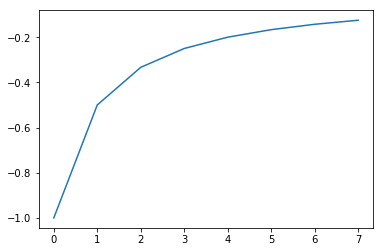

In [2]:
myplot.lineplot([1 / (1 - x) for x in range(2, 10)])

Since `myplot` is just an object. We can access its attributes or namespace using the `dot` operator and its name.

**Technical note:** in jupyter notebooks, if you make a change in a module you are importing, you have to restart the kernel in order to see the change from the notebook.


#### What happens when Python reaches an `import` statement?

I. Python looks for a `.py` file with the name of the module you specify in your current directory first.
    * If it does not find the module in the current directory it looks in other places.
    * You can get a list of the folders it looks in in order using the `sys` module attribute `sys.path`.
    * The first item is an empty string. That represents the current directory.

In [9]:
import sys
print(sys.path)

['', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python36.zip', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/lib-dynload', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/site-packages', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/Users/carlosgonzalezoliver/.ipython']


II. If Python finds the module, creates a namespace for the module and executes its code.

III. Creates a name that refers to the new namespace.

In [18]:
print(myplot.__dict__['lineplot'])
print(type(myplot))
print(id(myplot))

<function lineplot at 0x10e26a048>
<class 'module'>
4546266600


Typically, when you write a module, you only want it to contain some set of functions that get called when the importer calls them.

For example, the message `"hello from myplot"` was maybe there just when I was debugging `myplot.py` but I don't want whoever imports `myplot` to see it.

Every module has an automatically defined attribute called `__name__`.

The module that is being executed **first** gets the value `__name__ = '__main__'`.

Modules that are imported get their module name.

In [19]:
print(__name__)
print(myplot.__name__)

__main__
myplot


We can use this to fix our `myplot` module with a simple `if` statement so that the print statement is only executed if the module is not being imported, and instead is the one being executed first by python.

```python
import matplotlib.pyplot as plt

#set some attributes of the module

__doc__ = """
This module implements some useful plotting functions.
"""

__author__ = "Carlos"

def lineplot(y, title=None, xlabel=None, ylabel=None, save=False):
    """
    Makes simple line plot with given y values.
    return: None
    """
    plt.plot(y)
    
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if save:
        plt.savefig(save)
    plt.show()
    pass
if __name__ == "__main__":
    print("hello from myplot")
```

A few more useful tips on importing.

You can import multiple modules in one line

In [3]:
import os, myplot

You can give a different name to the module namespace than the default one.

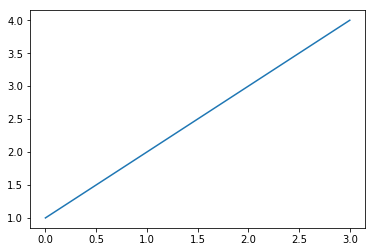

In [4]:
import myplot as mp

mp.lineplot([1, 2, 3, 4])

You can import specific definitions from the module using the `from` statement.

This places the selected definition in the current namespace so you don't need to use the `modulename.attribute` syntax.

You can also import all definitions from a module into the current namespace using the `*` character.

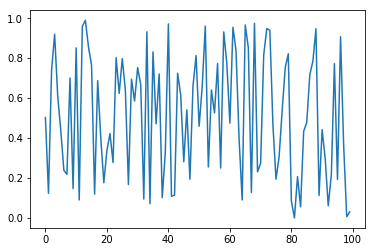

In [7]:
import random
from myplot import lineplot

lineplot([random.random() for _ in range(100)])

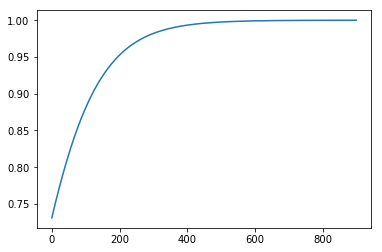

In [21]:
from math import *
from numpy import arange

lineplot([1 / (1 + exp(-x)) for x in arange(1, 10, 0.01)])

**NOTE:** Local namespace always takes priority over higher level namespaces.

For example, if I define my own `exp()` function in the current module, and import it, my function will be used and not the imported one.

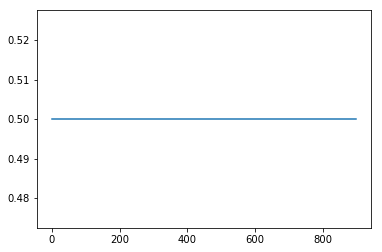

In [22]:
from math import exp

def exp(x):
    return 1

lineplot([1 / (1 + exp(-x)) for x in arange(1, 10, 0.01)])

**Style tip:** Import statements are typically placed in the following order: 1) standard python modules (e.g. os, random) ... more on them later) 2) third party modules (e.g. matplotlib) 3) your own modules. Separated by a line break.

This is not mandatory but it is good style.

In [6]:
import os
import random

import matplotlib

import myplot


## Packages

A **package** is a collection of **modules** organized like a file system.

Packages are used to group together modules that perform some similar function. Think of it as a swiss army knife.

A package is a directory which contains **modules** or other directories which themselves contain modules.

Let's make a package for plotting 1D, 2D, and 3D plots.

The file structure will look like this:


```
MyPlotLib
    __init__.py
    Plot1D
        __init__.py
        line.py
        bar.py
    Plot2D
        __init__.py
        scatter.py
    Plot3D
        __init__.py
        scatter3d.py
```

Python recognizes packages by looking for the `__init__.py` file inside a folder. The corresponding folder name is the package name.

Typically the `__init__.py` file is left blank, but it can be used to execute anything initializations at import time.


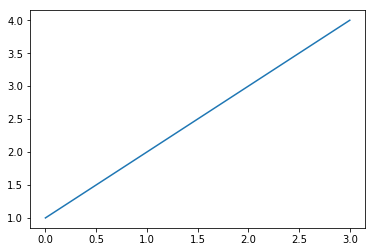

In [1]:
from MyPlotLib.Plot1D import line

line.lineplot([1, 2, 3, 4])

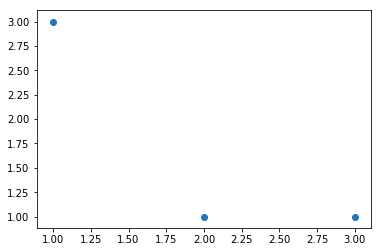

In [21]:
import MyPlotLib.Plot2D as plot2d

plot2d.scatter.myscatter([1, 2, 3], [3, 1, 1])

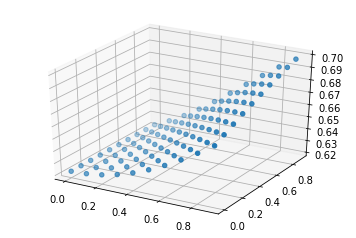

In [30]:
from random import random
from math import exp

from scipy.stats import multivariate_normal
import numpy as np

from MyPlotLib.Plot3D import scatter3d

x = []
y = []
z = []

def logistic(a):
    return 1 / (1 + np.exp(-a))

for xi in np.arange(0, 1, 0.1):
    for yi in np.arange(0, 1, 0.1):
        zi = logistic(np.dot(np.array([xi, yi]), np.array([xi,xi]).T))
        x.append(xi)
        y.append(yi)
        z.append(logistic(zi))
        
scatter3d.my3d_scatter(x, y, z)

# How to install other people's packages

Python has a huge community of people developing pieces of python code (modules and packages) that we can import and start using.

Technically all you have to do to install someone else's package is just copy the folder into one of the directories that python searches when importing.

Remember `sys.path`.

Two problems with this.

1. It can be tedious
2. Where would you find the packages?


Python solves this by providing the command line tool `pip` (anaconda has its own called `conda`).

`pip` and `conda` search online for packages that people have uploaded, automatically download and place them in the right folder for you.

`pip` searches in the "Python Package Index ([PyPi](https://pypi.python.org/pypi)) which is just a website that holds tons of python packages.

`conda` has its own package repository [here](https://anaconda.org/anaconda/repo)

All you have to do to install a package is go on your terminal (or command line) and type in either:

`pip install [package name]`

or

`conda install [package name]`

Conda specializes in scientific packages, and `pip` has everything, so if you can't find it in `conda` try `pip`